In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_results(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn=50, path_results = "./results_tf"):    
    path_acc = "/accuracy_" + src_dataset + "_to_" + tgt_dataset +\
               "_" + method + "_k" + str(k_shot) +\
               "_nepochsnn" + str(n_epochs_nn)

    L_acc = np.loadtxt(path_results + path_acc, delimiter=",")
    print("Accuracy:", np.mean(L_acc), np.std(L_acc))


    path_acc_baseline = "/accuracy_baseline_" + src_dataset + "_to_" +\
                        tgt_dataset + "_k" + str(k_shot) +\
                        "_nepochsnn" + str(n_epochs_nn)
    L_acc_baseline = np.loadtxt(path_results + path_acc_baseline, delimiter=",")
    print("Baseline:", np.mean(L_acc_baseline), np.std(L_acc_baseline))


def show_imgs(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn=50, save=False, path_results = "./results_tf"):
    path_imgs = "/synth_images_" + src_dataset + "_to_" + tgt_dataset +\
                "_" + method + "_k" + str(k_shot) +\
                "_nepochsnn" + str(n_epochs_nn) + ".npy"

    imgs = np.load(path_results + path_imgs)
 
    if tgt_dataset == "CIFAR10":
        # labels = ["Plane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
        mean = [0.4914, 0.4822, 0.4465]
        std = [0.2023, 0.1994, 0.2010]

    if tgt_dataset in ["MNIST", "FMNIST", "KMNIST", "USPS"]:
        imgs = np.clip(np.transpose(imgs, (1,0,2)).reshape(-1,28,28), 0, 1)
    elif tgt_dataset == "CIFAR10":
        imgs = np.transpose(imgs, (1,0,2)).reshape(-1, 3, 32, 32)
        
        for k in range(3):
            imgs[:,k] = imgs[:,k] * std[k] + mean[k]
            
        imgs = np.clip(np.transpose(imgs, (0, 2, 3, 1)), 0, 1)
    
    # Create the plot
    fig, axes = plt.subplots(10, 10, figsize=(10, 10))  # 10x10 grid
    fig.subplots_adjust(hspace=0, wspace=0.05)  # Add spacing between rows
    
    for i, ax in enumerate(axes.flat):
        if tgt_dataset in ["MNIST", "FMNIST", "KMNIST", "USPS"]:
            ax.imshow(imgs[i], cmap='gray')  # Adjust cmap if images are in color
        else:
            ax.imshow(imgs[i])

        ax.axis('off')  # Hide axes for clean visualization
        
    if save:
        plt.savefig("./imgs_tf_" + src_dataset + "_to_" + tgt_dataset + "_" + method + "_k" + str(k_shot) + ".pdf",
                    format="pdf", bbox_inches='tight')
    
    plt.show()

### MMD + Riesz SW Kernel

$K(\mu,\nu)=-SW_2(\mu,\nu)$.

In [3]:
src_dataset = "MNIST"
tgt_dataset = "FMNIST"
method = "hierarchical_mmd"
# k_shot = 5
n_epochs_nn = 50

for k_shot in [1,5,10,100]:
    print("k_shot = " + str(k_shot))
    get_results(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn)
    print()

k_shot = 1
Accuracy: 0.40475717186927795 0.04675681013647308
Baseline: 0.26015791594982146 0.0528954099306651

k_shot = 5
Accuracy: 0.6152932683626811 0.016138414186715393
Baseline: 0.3842224031686783 0.06818870406929055

k_shot = 10
Accuracy: 0.6535562674204508 0.015461095045375493
Baseline: 0.5423168937365214 0.07382776416551882

k_shot = 100
Accuracy: 0.7471802155176799 0.008408277551233554
Baseline: 0.7130042632420858 0.013266112110294541



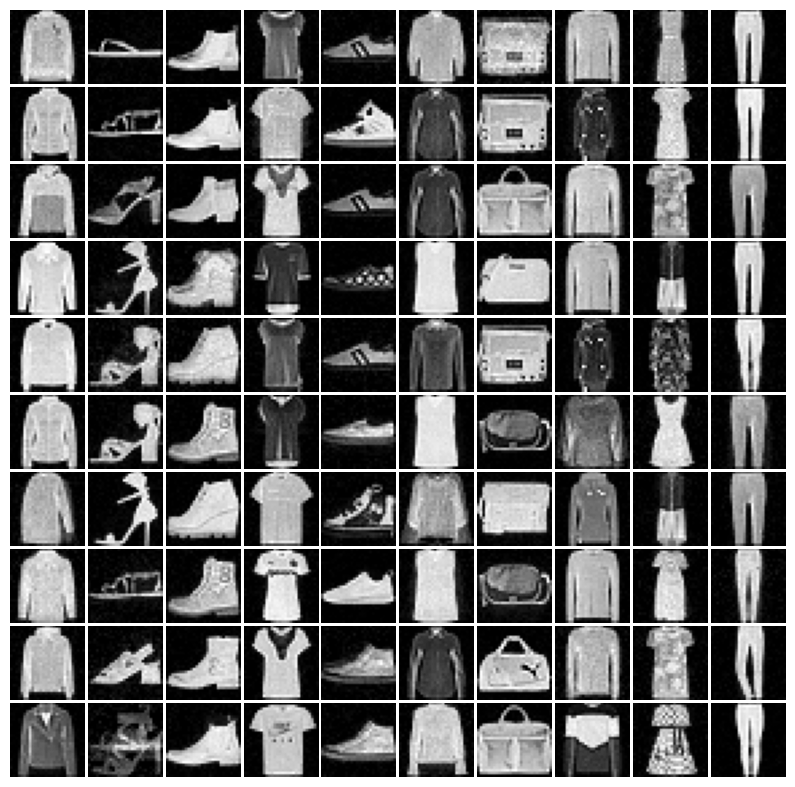

In [4]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn)

In [5]:
src_dataset = "MNIST"
tgt_dataset = "KMNIST"
method = "hierarchical_mmd"
# k_shot = 5
n_epochs_nn = 50

for k_shot in [1,5,10,100]:
    print("k_shot = " + str(k_shot))
    get_results(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn)
    print()

k_shot = 1
Accuracy: 0.20912951330343882 0.01973620657615758
Baseline: 0.18395700951417288 0.030943160271408584

k_shot = 5
Accuracy: 0.3739517072836558 0.02213183780063144
Baseline: 0.2584925760825475 0.039680404217833545

k_shot = 10
Accuracy: 0.4470408777395884 0.01756929691110566
Baseline: 0.3048898686965307 0.048415943697778435

k_shot = 100
Accuracy: 0.6680798927942911 0.00767624701646051
Baseline: 0.6041467706362407 0.010282463585989337



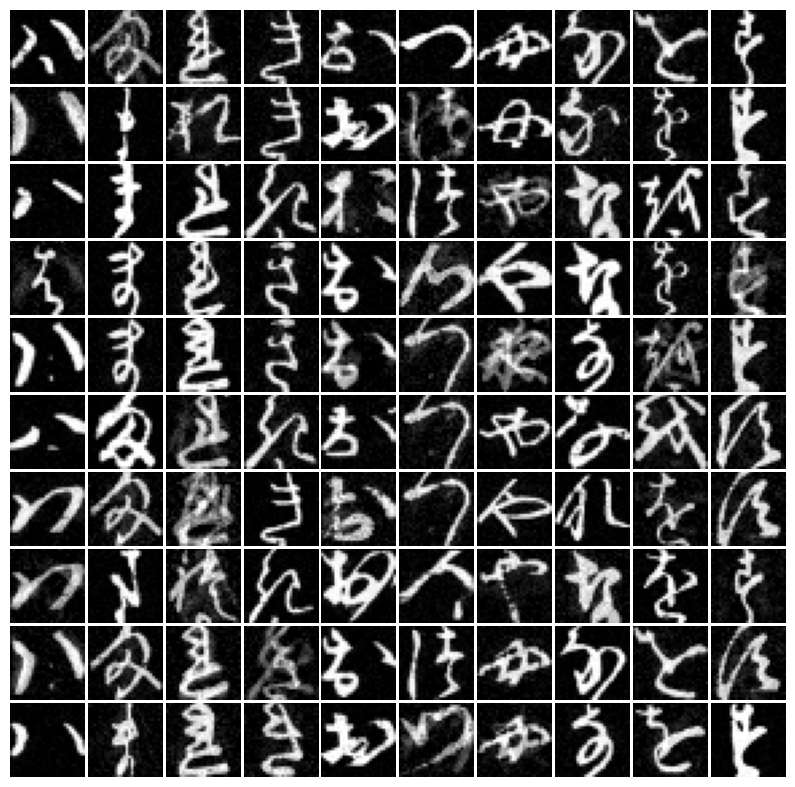

In [6]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn)

In [7]:
src_dataset = "MNIST"
tgt_dataset = "USPS"
method = "hierarchical_mmd"
# k_shot = 5
n_epochs_nn = 50

for k_shot in [1,5,10,100]:
    print("k_shot = " + str(k_shot))
    get_results(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn)
    print()

k_shot = 1
Accuracy: 0.37360875407854716 0.06112788111741543
Baseline: 0.32473816970984143 0.07872555629454342

k_shot = 5
Accuracy: 0.73046875 0.010112137373319969
Baseline: 0.5148069540659587 0.09620374423049918

k_shot = 10
Accuracy: 0.771713650226593 0.012235902726149281
Baseline: 0.597257129351298 0.11744736179188525

k_shot = 100
Accuracy: 0.8969882408777873 0.003974234666415739
Baseline: 0.8740092992782593 0.006981745348143406



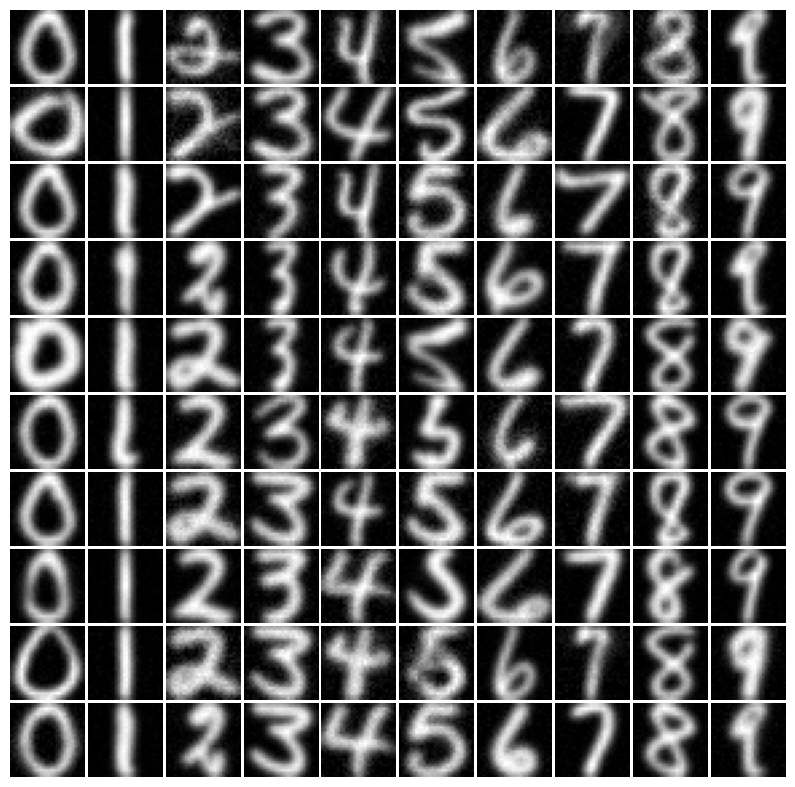

In [8]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn)

### MMD Prod

Method from [1].

[1] Hua, X., Nguyen, T., Le, T., Blanchet, J., & Nguyen, V. A. (2023). Dynamic flows on curved space generated by labeled data. arXiv preprint arXiv:2302.00061.

In [9]:
src_dataset = "MNIST"
tgt_dataset = "FMNIST"
method = "mmd_product"
# k_shot = 5
n_epochs_nn = 50

for k_shot in [1,5,10,100]:
    print("k_shot = " + str(k_shot))
    get_results(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn)
    print()

k_shot = 1
Accuracy: 0.3643511215845744 0.033044076728426554
Baseline: 0.26015791594982146 0.0528954099306651

k_shot = 5
Accuracy: 0.6269572774569193 0.011316671779556909
Baseline: 0.3842224031686783 0.06818870406929055

k_shot = 10
Accuracy: 0.662055476506551 0.01010470768658028
Baseline: 0.5423168937365214 0.07382776416551882

k_shot = 100
Accuracy: 0.7350119551022848 0.006819792840549811
Baseline: 0.7130042632420858 0.013266112110294541



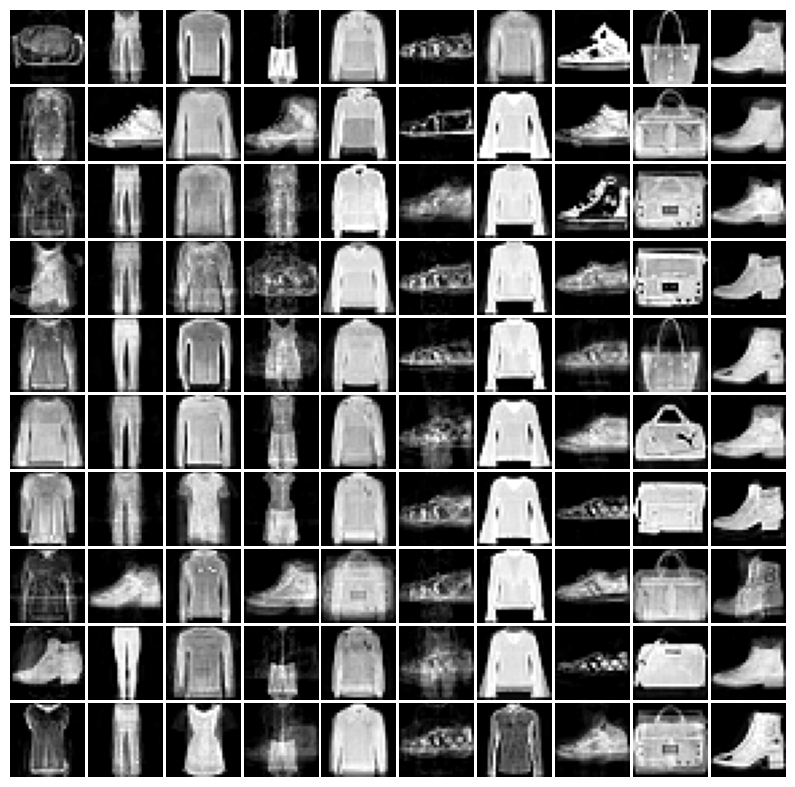

In [10]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn)

In [11]:
src_dataset = "MNIST"
tgt_dataset = "KMNIST"
method = "mmd_product"
# k_shot = 5
n_epochs_nn = 50

for k_shot in [1,5,10,100]:
    print("k_shot = " + str(k_shot))
    get_results(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn)
    print()

k_shot = 1
Accuracy: 0.19393577675024667 0.01930112241636865
Baseline: 0.18395700951417288 0.030943160271408584

k_shot = 5
Accuracy: 0.3904856741428375 0.010095884842442013
Baseline: 0.2584925760825475 0.039680404217833545

k_shot = 10
Accuracy: 0.44112261732419333 0.01184768527321115
Baseline: 0.3048898686965307 0.048415943697778435

k_shot = 100
Accuracy: 0.6238521814346314 0.011695454182963423
Baseline: 0.6041467706362407 0.010282463585989337



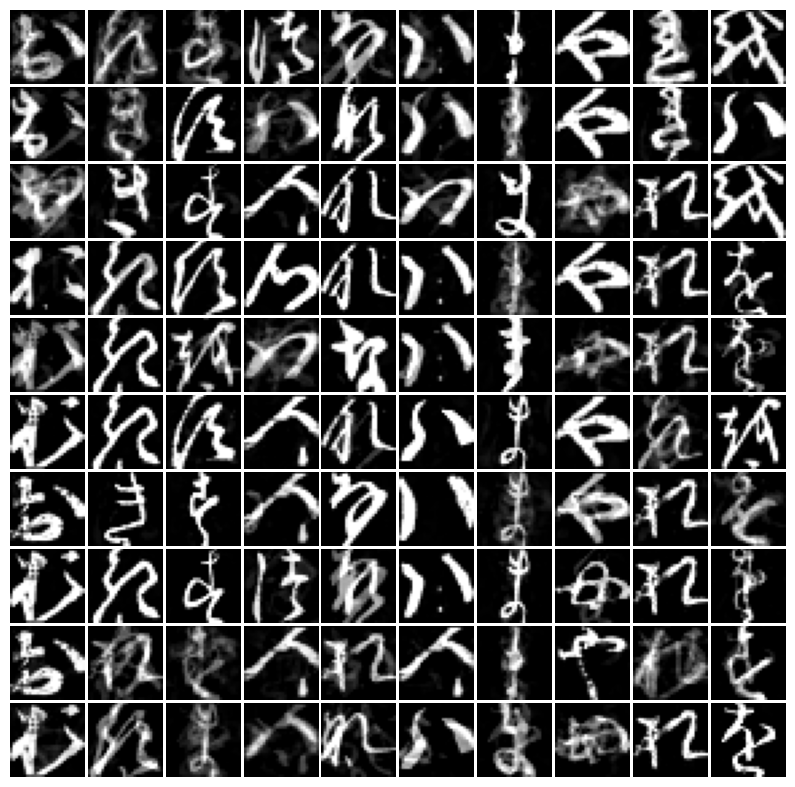

In [12]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn)

In [13]:
src_dataset = "MNIST"
tgt_dataset = "USPS"
method = "mmd_product"
# k_shot = 5
n_epochs_nn = 50

for k_shot in [1,5,10,100]:
    print("k_shot = " + str(k_shot))
    get_results(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn)
    print()

k_shot = 1
Accuracy: 0.35003113945325215 0.05590384311060773
Baseline: 0.32473816970984143 0.07872555629454342

k_shot = 5
Accuracy: 0.6962013125419617 0.013292894025146152
Baseline: 0.5148069540659587 0.09620374423049918

k_shot = 10
Accuracy: 0.7577969392140707 0.012425823463494717
Baseline: 0.597257129351298 0.11744736179188525

k_shot = 100
Accuracy: 0.8807305971781413 0.005852485571527527
Baseline: 0.8740092992782593 0.006981745348143406



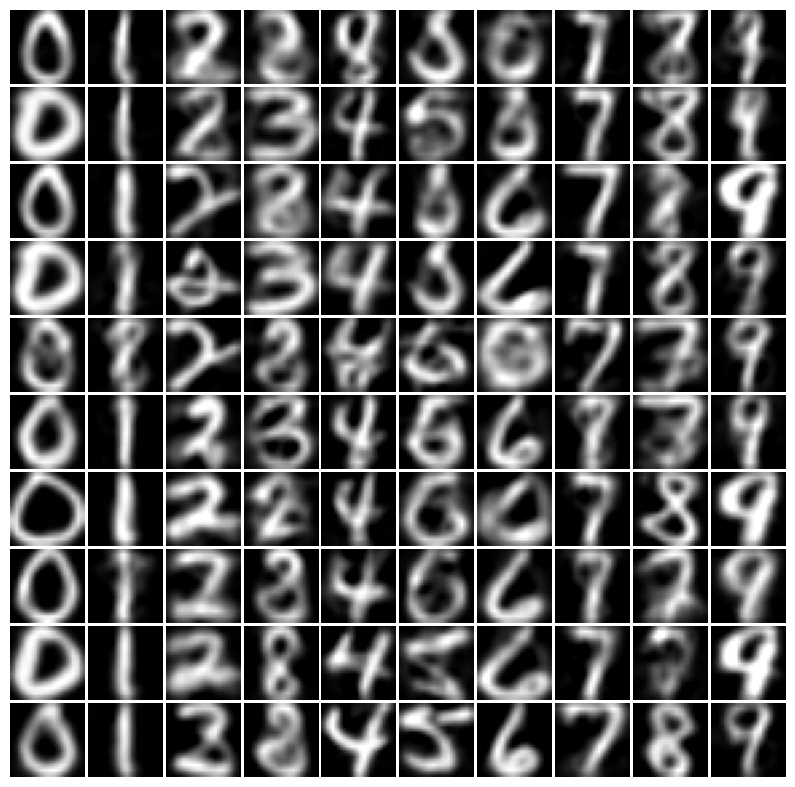

In [14]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn)

### OTDD

From [2]

[2] Alvarez-Melis, D., & Fusi, N. (2021, July). Dataset dynamics via gradient flows in probability space. In International conference on machine learning (pp. 219-230). PMLR.

In [15]:
src_dataset = "MNIST"
tgt_dataset = "FMNIST"
method = "otdd"
# k_shot = 5
n_epochs_nn = 50

for k_shot in [1, 5, 10]: # [1,5,10,100]:
    print("k_shot = " + str(k_shot))
    get_results(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn)
    print()

k_shot = 1
Accuracy: 0.2978834946950277 0.025631990558950036
Baseline: 0.26015791594982146 0.0528954099306651

k_shot = 5
Accuracy: 0.5975318551063538 0.017523645376544227
Baseline: 0.3842224031686783 0.06818870406929055

k_shot = 10
Accuracy: 0.6402667323748271 0.0142478832865351
Baseline: 0.5423168937365214 0.07382776416551882



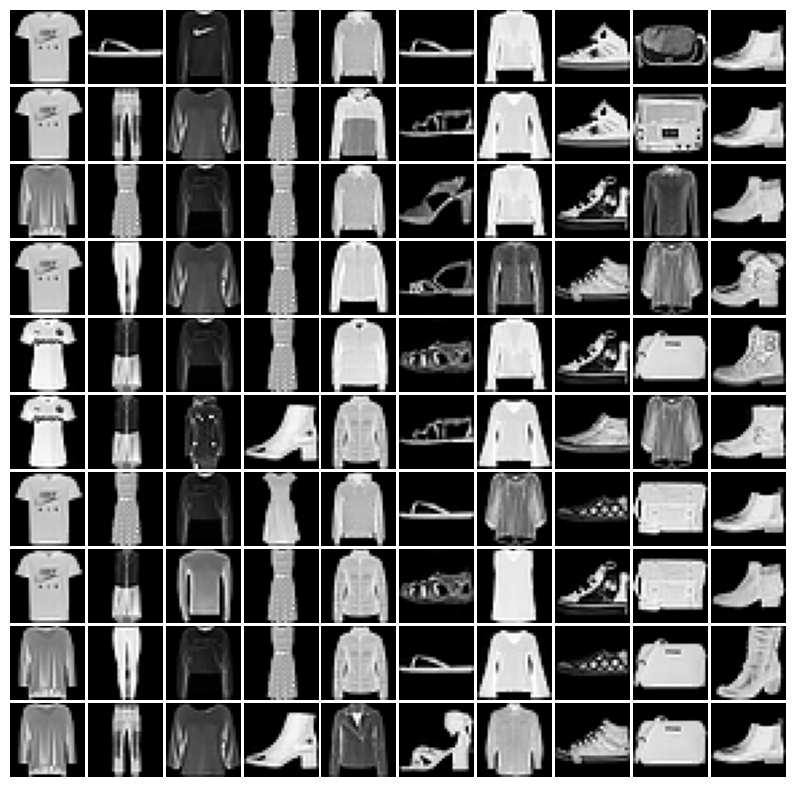

In [16]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn)

In [17]:
src_dataset = "MNIST"
tgt_dataset = "KMNIST"
method = "otdd"
# k_shot = 5
n_epochs_nn = 50

for k_shot in [1, 5, 10, 100]: # [1,5,10,100]:
    print("k_shot = " + str(k_shot))
    get_results(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn)
    print()

k_shot = 1
Accuracy: 0.1884089728196462 0.02090747967684093
Baseline: 0.18395700951417288 0.030943160271408584

k_shot = 5
Accuracy: 0.31317675709724424 0.013648775028834971
Baseline: 0.2584925760825475 0.039680404217833545

k_shot = 10
Accuracy: 0.3408771296342214 0.008822182148099975
Baseline: 0.3048898686965307 0.048415943697778435

k_shot = 100
Accuracy: 0.6630838712056478 0.00942342891321212
Baseline: 0.6041467706362407 0.010282463585989337



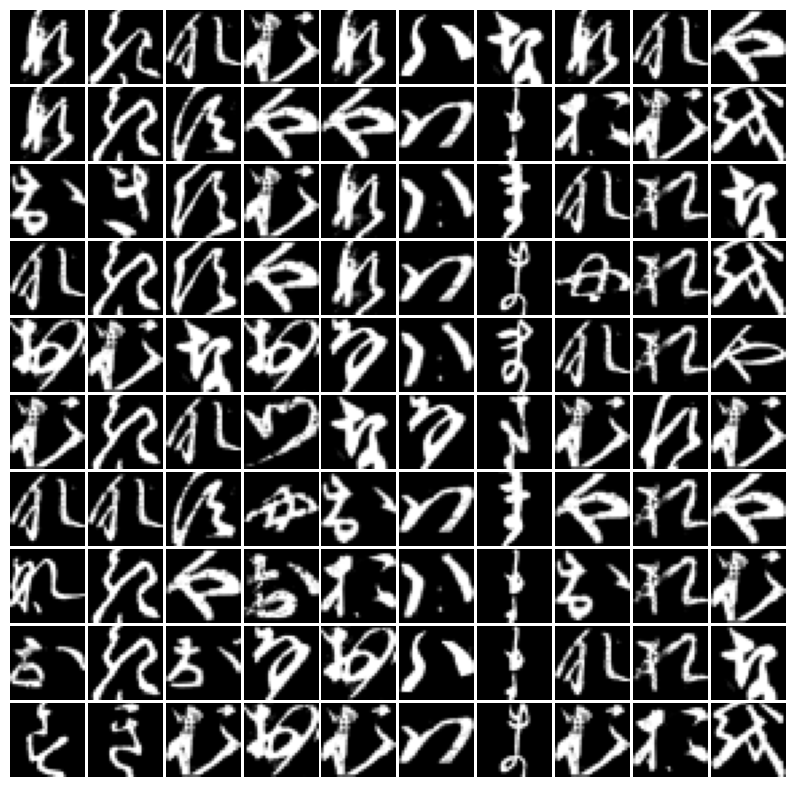

In [18]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn)

In [21]:
src_dataset = "MNIST"
tgt_dataset = "USPS"
method = "otdd"
# k_shot = 5
n_epochs_nn = 50

for k_shot in [1, 5, 10]: # [1,5,10,100]:
    print("k_shot = " + str(k_shot))
    get_results(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn)
    print()

k_shot = 1
Accuracy: 0.3947704394658407 0.07866736006690196
Baseline: 0.32473816970984143 0.07872555629454342

k_shot = 5
Accuracy: 0.7329752643903097 0.014154389122355794
Baseline: 0.5148069540659587 0.09620374423049918

k_shot = 10
Accuracy: 0.7268582940101623 0.026450083669128384
Baseline: 0.597257129351298 0.11744736179188525



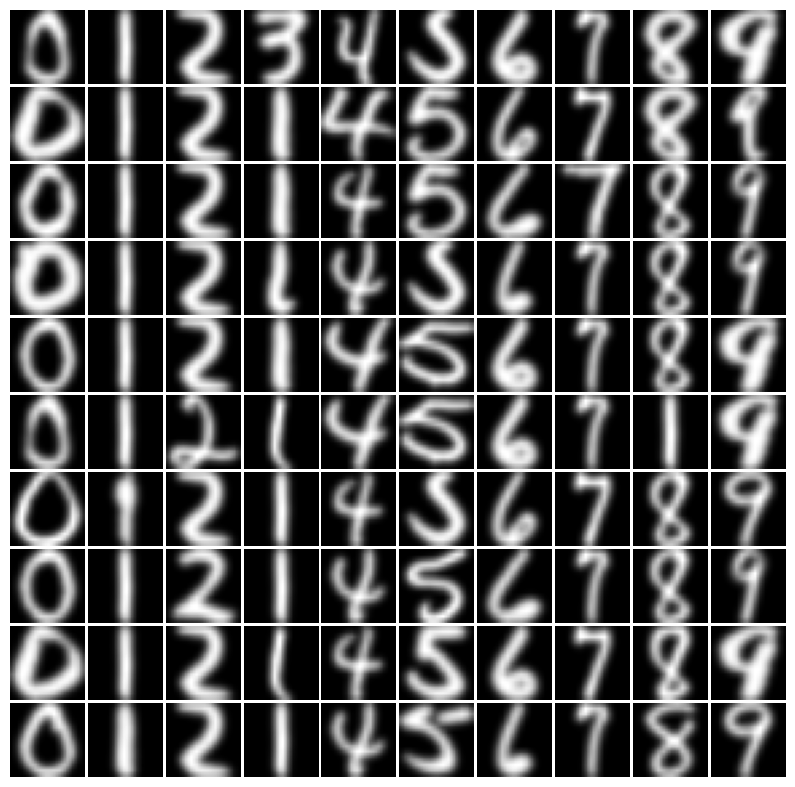

In [22]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn)